So far, only the use of first-order derivatives has been discussed in this chapter. However, the process with first-order derivatives can be slow with some error surfaces. The problem is caused by the nature of <font color='red'>curvature</font> (i.e., <font color='blue'>second-order derivatives</font>, <font color='orange'>changing gradient</font>), where the first-order gradient does not contain the information needed to control the size of the update.

<font color='red'>In general, second-order methods approximate the local loss surface with a quadratic bowl, which is more accurate than the linear approximation.</font> Some second-order methods like the *Newton-methods* require exactly one iteration in order to find the local optimal solution for a quadratic surface. Of course, the loss surface of neural method is typically not quadratic. Nevertheless, the approximation is often good enough that gradient-descent methods are **greatly accelerated** at least in cases where the change in the gradient is not too sudden or drastic.


# Second-Order derivatives

Consider a parameter vector $W = (w_1 \cdots w_d)^T$, which is expressed as a column vector. Its gradient (i.e. first-order derivatives vector) of the loss function $L(W)$ is denoted by

$$G =\nabla L(W)= \left(\frac{\partial L(W)}{\partial w_1} \cdots \frac{\partial L(W)}{\partial w_d}\right)^T$$

And the second-order derivatives of the loss function are of the following form

$$H =\nabla \nabla L(W)= \begin{bmatrix}
\frac{\partial^2 L(W)}{\partial w_1\partial w_1} &\frac{\partial^2 L(W)}{\partial w_1\partial w_2} &\cdots &\frac{\partial^2 L(W)}{\partial w_1\partial w_d}\\
\frac{\partial^2 L(W)}{\partial w_2\partial w_1} &\frac{\partial^2 L(W)}{\partial w_2\partial w_2} &\cdots &\frac{\partial^2 L(W)}{\partial w_2\partial w_d}\\
\vdots &\vdots &\ddots &\vdots\\
\frac{\partial^2 L(W)}{\partial w_d\partial w_1} &\frac{\partial^2 L(W)}{\partial w_d\partial w_2} &\cdots &\frac{\partial^2 L(W)}{\partial w_d\partial w_d}\\
\end{bmatrix}$$

which is called *Hessian matrix*.

## Quadratic approximation and Newton update
One can write a quadratic approximation of the loss function in the vicinity of parameter vector $W_0$ by using the following Taylor expansion

$$L(W) \approx L(W_0) + (W-W_0)^T[\nabla L(W_0)]+\frac{1}{2}(W-W_0)^T H (W- W_0)$$

Where

- $W_0$ is the current parameter vector.
- $W$ is the vincinity of $W_0$.
- $\nabla L(W_0)$ is the gradient computed at $W_0$.
- $H$ is the Hessian computed at $W_0$.

For a quadratic loss function, the loss surface is a bowl, and we can use the Newton update to reach the bottom of the bowl in a single step.
$$\begin{align*}
\nabla L(W^*) &= \nabla \Big\{ L(W_0) + (W^*-W_0)^T[\nabla L(W_0)]+\frac{1}{2}(W^*-W_0)^T H (W^*- W_0) \Big\}\\
0 &= \nabla L(W_0) + H(W^*-W_0)\\
\Rightarrow W^* &= W_0 - H^{-1}[\nabla L(W_0)]
\end{align*}$$

However, in most cases, the loss function is more complicated, so multiple Newton updates will be needed.

## Improvement from first-order to second-order

Comparing to the steepest-gradient descent, the second-order method (Newton update) premultiplies the gradient with the inverse of the Hessian. This premultiplication plays a key role in changing the direction of the steepest-graident towards low-curvature directions, because the Hessain matrix comprises the changing rate of every directions for each element in the gradient. This property can greatly accelerate the learning procedure and keep it from suffering oscillation in valley.

Also, the learning rate is already incorporated into the Hessian matrix implicitly, so that we don't need to determine the learning rate during the learning process.




## Limitation

In most large-scale neural network settings, the Hessian is too large to store or compute explicitly. It is not uncommon to have neural networks with millions of parameters. Trying to compute the inverse of a $10^6\times 10^6$ Hessian matrix is impractical with the computational power today. In fact, it is difficult to even compute the Hessian, let alone invert it!

Therefore, many approximations and variations of the Newton method have been developed.

-------------

# Line search along eigenvectors

An intuitive perspective for finding the optimum vector of the bowl given by a Hessian is to make the best (projected) gradient-descent step along each eigenvector so as to minimize the loss function. The best movement along a particular diretion is done using line search to select the step size.

------------------

# Conjugate Gradient


Although it is impractical to compute the eigenvectors of the Hessian, there are other efficeintly computable directions satisfying similar properties; this property is referred to as *mutual conjugacy* of vectors.

$$\left.\begin{array}{ll}
q_i^Tq_j &= &0\\
H q_j &= &\lambda_j q_j
\end{array}\right\}
\Rightarrow \color{red}{q_i^T H q_j = 0}$$

where $q_i$ and $q_j$ are the eigenvectors of the Hessian matrix. And $\lambda_j$ is the corresponding eigenvalue of $q_j$.

This condition is referred to as the *mutual conjugacy condition*. 

## Why we need mutual conjugacy condition




## Conjugate gradient algorithm




see <a href='https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf'>painless conjugate gradient</a> for more details

--------------

# Hessian-Free Optimization







----------------------

# Quasi-Newton Methods and BFGS







-----------------------

# Problems with Second-Order Methods:Saddle Points







<IPython.core.display.Javascript object>


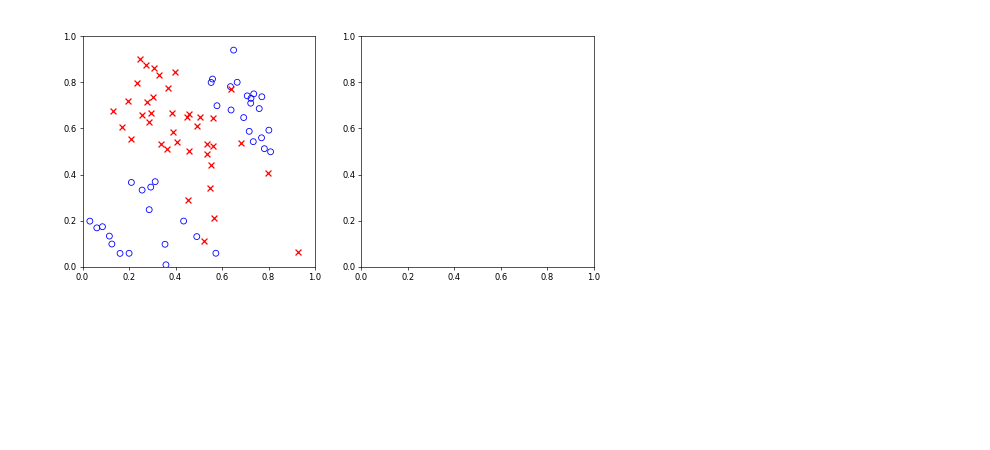

LinAlgError: Singular matrix

In [685]:

# for showing iteratively
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import warnings

# convert warnings to error
warnings.filterwarnings("ignore")

# learning rate decay
epoch_t = 0

# conjugate gradient algorithm
q0 = None

count = 0

TRAIN_FINISHED = 100000

LT = 5000
LR = 0.1
X = None
Y = None
x = None
y = None
cont = None
levels = None

Gaussian = lambda t, mu, sigma: 1.0/(sigma*np.sqrt(2*np.pi))*np.exp(-(t-mu)**2/(2*sigma**2))

class EXP_TRAIN_FINISHED(Exception):
    pass

A = None
F = None
def Adam(derivatives):
    a0 = 0.1
    rf = 0.9
    r = 0.999
    global A, F
    if A is None:
        A = np.full(derivatives.shape, 0)
        F = np.full(derivatives.shape, 0)
    A = r*A + (1-r)*derivatives**2
    F = rf*F + (1-rf)*derivatives
    at = a0 * (np.sqrt(1-r)/(1-rf))
    return -at/(np.sqrt(A)+1e-8)*F

# def conjugate_gradient(derivatives, hessian):
#     global q0
#     if q0 is None:
#         q1 = -derivatives
#     else:
#         denominator = q0 @ hessian @ q0
#         if denominator == 0:
#             print(derivatives)
#             print(q0)
#             print(hessian)
#             raise Exception("conjugate gradient denominator zero")
#         numerator = q0 @ hessian @ derivatives
#         beta = numerator/denominator
#         q1 = -derivatives +  beta * q0
#     q0 = q1
#     alpha = (q0 @ derivatives) / (q0 @ hessian @ q0)
#     return alpha*q1

def conjugate_gradient(derivatives, hessian):
    print(hessian)
    direction = derivatives
    residual = derivatives
    ret = 0.0
    for i in range(len(derivatives)-1):
        denominator = direction @ hessian @ direction
        numerator = residual @ residual
        if denominator == 0:
            print(direction)
            print(hessian)
            print(residual)
            raise Exception("conjugate gradient denominator zero")
        alpha = numerator/denominator
        #print(alpha)
        ret += alpha * direction
        r = residual
        residual = residual - alpha * hessian @ direction
        beta = (residual @ residual)/(r @ r)
        direction = residual + beta * direction
    print(ret)
    return ret

def tanh(a):
    y = np.tanh(a)
    return y

def dtanh(o):
    y = 1-o**2
    return y

def sigmoid(a):
    y = 1.0/(1.0+np.exp(-a))
    return y

def dsigmoid(o):
    y = o*(1-o)
    return y

def compute_weights_error(derivatives, variance):
    ret = LR * variance * derivatives
    return ret

class Layer:
    network = None
    unit_number = 0
    outputs = None
    errors = None
    weights = None
    derivatives = None
    prev_layer = None
    next_layer = None
    variance = 0.0
    
    w_start = 0
    b_start = 0
    act_errors = None
    
    act_func = tanh
    link_func = dtanh
    
    def __init__(self, K, afunc=tanh, lfunc=dtanh):
        self.unit_number = K
        self.outputs = np.zeros(K)
        self.errors = np.zeros(K)
        self.act_errors = np.zeros(K)
        self.act_func = afunc
        self.link_func = lfunc
        
    def build_connection(self, network):
        self.network = network
        j = self.prev_layer.unit_number
        self.variance = 1.0/(j * self.unit_number)
        
        w_size = self.unit_number * j
        self.w_start = self.network.w_size
        self.network.weights = np.hstack((self.network.weights, np.random.normal(0, np.sqrt(self.variance), w_size)))
        self.network.w_size += w_size
        
        b_size = self.unit_number
        self.b_start = self.network.w_size
        self.network.weights = np.hstack((self.network.weights, np.zeros(b_size)))
        self.network.w_size += b_size
        
        self.network.derivatives = np.zeros(self.network.w_size)
        self.network.hessian = np.zeros((self.network.w_size, self.network.w_size))
        self.network.b = np.zeros(self.network.w_size)

    def forward_propagation(self):
        for k in range(self.unit_number):
            s = 0.0
            for j in range(self.prev_layer.unit_number):
                s += self.prev_layer.outputs[j] * self.network.weights[self.w_start+k*self.prev_layer.unit_number+j]
            s += self.network.weights[self.b_start + k]
            self.outputs[k] = self.act_func(s)

    def backward_propagation(self):
        for k in range(self.unit_number):
            s = 0.0
            a = 0.0
            for l in range(self.next_layer.unit_number):
                s += self.next_layer.errors[l] * self.network.weights[self.next_layer.w_start+l*self.unit_number+k]
                a += self.next_layer.act_errors[l] * self.network.weights[self.next_layer.w_start+l*self.unit_number+k]
            self.errors[k] = self.link_func(self.outputs[k]) * s
            self.act_errors[k] = self.link_func(self.outputs[k]) * a
            for j in range(self.prev_layer.unit_number):
                self.network.derivatives[self.w_start+k*self.prev_layer.unit_number+j] += self.errors[k] * self.prev_layer.outputs[j]
                self.network.b[self.w_start+k*self.prev_layer.unit_number+j] = self.act_errors[k] * self.prev_layer.outputs[j]
            self.network.derivatives[self.b_start+k] += self.errors[k]
            self.network.b[self.b_start+k] = self.act_errors[k]
            
    def dump(self):
        print("outputs {}".format(self.outputs))
        print("errors {}".format(self.errors))
        print("weights {}".format(self.weights))
        print("derivatives {}".format(self.derivatives))

# Mixture Gaussian Parameters Layer
class OutputLayer(Layer):
    targets = None
            
    def backward_propagation(self):
        self.errors = self.outputs-self.targets
        self.act_errors = np.ones(self.act_errors.shape)
        for k in range(self.unit_number):
            for j in range(self.prev_layer.unit_number):
                self.network.derivatives[self.w_start+k*self.prev_layer.unit_number+j] += self.errors[k] * self.prev_layer.outputs[j]
                self.network.b[self.w_start+k*self.prev_layer.unit_number+j] = self.act_errors[k] * self.prev_layer.outputs[j]
            self.network.derivatives[self.b_start+k] += self.errors[k]
            self.network.b[self.b_start+k] = self.act_errors[k]
            
    def update_target(self, t):
        self.targets = t

class InputLayer(Layer):
    outputs = None
    unit_number = 0
    prev_layer = None
    next_layer = None
    
    def __init__(self, K):
        self.unit_number = K
        
    def build_connection(self, network):
        self.network = network
        return
        
    def update_input(self, inputs):
        self.outputs = inputs

class Network:
    input_layer = None
    output_layer = None
    inputs = None
    targets = None
    hessian = None
    weights = None
    derivatives = None
    b = None
    w_size = 0
    observations = None
    targets = None
    
    def __init__(self):
        self.weights = np.array([])
        return
    
    def add_layer(self, layer):
        if self.input_layer == None:
            self.input_layer = layer
        else:
            layer.prev_layer = self.output_layer
            self.output_layer.next_layer = layer
            
        self.output_layer = layer
        layer.build_connection(self)
        
    def update_hessian(self):
        b = self.b.reshape(-1, 1)
        y = self.output_layer.outputs[0]
        self.hessian += y * (1-y) * (b @ b.T)
        
    def compute_finite_derivatives(self, observations, targets):
        N = len(observations)
        for n in range(N):
            self.input_layer.update_input(observations[n])
            self.output_layer.update_target(targets[n])
            
            layer = self.input_layer.next_layer
            while layer != None:
                layer.forward_propagation()
                layer = layer.next_layer
            layer = self.output_layer
            while layer != self.input_layer:
                layer.backward_propagation()
                layer = layer.prev_layer
    
    def compute_hessian_with_derivatives(self):
        e = 1e-8
        derivatives = np.copy(self.derivatives)
        length = len(self.weights)
        for i in range(length):
            error = np.zeros(self.derivatives.shape)
            self.weights[i] += e
            self.derivatives *= 0
            self.compute_finite_derivatives(self.observations, self.targets)
            error += self.derivatives
            self.weights[i] -= 2*e
            self.derivatives *= 0
            self.compute_finite_derivatives(self.observations, self.targets)
            error -= self.derivatives
            self.hessian[i] = error/(2*e)
            self.weights[i] += e
        self.derivatives = np.copy(derivatives)
        #print("compute with derivatives\n", self.hessian)
        
    def compute_hessian_with_error(self):
        e = 1e-5
        derivatives = np.copy(self.derivatives)
        length = len(self.weights)
        for i in range(length):
            for j in range(length):
                if j < i:
                    continue
                error = 0.0
                self.weights[i] += e
                self.weights[j] += e
                error += self.Get_Error(self.observations, self.targets, 0)
                self.weights[i] -= 2*e
                error -= self.Get_Error(self.observations, self.targets, 0)
                self.weights[i] += 2*e
                self.weights[j] -= 2*e
                error -= self.Get_Error(self.observations, self.targets, 0)
                self.weights[i] -= 2*e
                error += self.Get_Error(self.observations, self.targets, 0)
                self.weights[i] += e
                self.weights[j] += e
                self.hessian[i][j] = error/(4*e**2)
                self.hessian[j][i] = self.hessian[i][j]
                
        self.derivatives = np.copy(derivatives)
        #print("compute with error\n", self.hessian)
        #raise EXP_TRAIN_FINISHED("Test")
                
        
    def update(self, update_weight):
        #self.update_hessian()
        if update_weight == 1:
            if np.allclose(self.derivatives, np.zeros(self.w_size)):
                raise EXP_TRAIN_FINISHED("Train finished")
            
            # Adam
            global count
            if count<50:
                count += 1
                ret = Adam(self.derivatives)
            else:
            # Conjugate Gradients algorithm
                #self.compute_hessian_with_error()
                self.compute_hessian_with_derivatives()
                #ret = conjugate_gradient(self.derivatives, self.hessian)
                ret = (-np.linalg.inv(self.hessian) @ self.derivatives)
            
            self.weights += ret
            self.derivatives *= 0
            self.hessian *= 0
        return 1
        
    def train(self, observations, targets):
        self.observations = observations
        self.targets = targets
        
        N = len(observations)
        for n in range(N):
            self.input_layer.update_input(observations[n])
            self.output_layer.update_target(targets[n])
            
            layer = self.input_layer.next_layer
            while layer != None:
                layer.forward_propagation()
                layer = layer.next_layer
            
            layer = self.output_layer
            while layer != self.input_layer:
                layer.backward_propagation()
                layer = layer.prev_layer
            
            # gradient descent/stotastic gradient descent
            if n == N-1:
                update_weight = 1
            else:
                update_weight = 0
            self.update(update_weight)

    def Get_Error(self, observations, targets, show):
        N = len(observations)
        es = 0.0
        for n in range(N):
            self.input_layer.update_input(observations[n])
            self.output_layer.update_target(targets[n])
            
            layer = self.input_layer.next_layer
            while layer != None:
                layer.forward_propagation()
                layer = layer.next_layer
            #print("target {}".format(self.targets))
            #print("output {}".format(self.output_layer.outputs))
            #e = np.sum(self.targets * np.log(self.output_layer.outputs))
            # for sigmoid only
            if targets[n] == 0:
                e = np.log(1 - self.output_layer.outputs[0])
            else:
                e = np.log(self.output_layer.outputs[0])
            es += e
            if show == 1:
                print(self.targets, self.output_layer.outputs)
        return -es
                
    def test(self, new_input):
        self.input_layer.update_input(new_input)
        
        layer = self.input_layer.next_layer
        while layer != None:
            layer.forward_propagation()
            layer = layer.next_layer
        return self.output_layer.outputs
    
    def dump(self):
        layer = self.input_layer.next_layer
        while layer != None:
            layer.dump()
            layer = layer.next_layer
        return

def gen_training_data(ax):
    mean1 = [0.2, 0.2]
    cov1 = [[0.03, -0.01], 
           [-0.01, 0.02]]
    X1 = np.random.multivariate_normal(mean1, cov1, 20)

    mean12 = [0.7, 0.7]
    cov12 = [[0.01, -0.01], 
           [-0.01, 0.02]]
    X12 = np.random.multivariate_normal(mean12, cov12, 20)
    X1 = np.vstack((X1, X12))
    T1 = np.zeros(len(X1))
    
    mean2 = [0.4, 0.6]
    cov2 = [[0.03, -0.02], 
           [-0.02, 0.04]]
    X2 = np.random.multivariate_normal(mean2, cov2, 40)
    T2 = np.ones(len(X2))
    
    ax.scatter(X1.T[0], X1.T[1], s=50,  facecolors='none', edgecolors='blue')
    ax.scatter(X2.T[0], X2.T[1], s=50,  facecolors='red', edgecolors='none', marker='x')
    
    X = np.vstack((X1, X2))
    T = np.hstack((T1, T2))
    return X, T

def show_pic(network, ax, fig, init=0):
    global x, y, X, Y, Z, cont, levels
    if init == 1:
        x = np.linspace(0,1,20)
        y = np.linspace(0,1,20)
        X, Y = np.meshgrid(x, y)
        levels = np.arange(0.1, 1.1, 0.2)
    
    Z = np.zeros(X.shape)
    for i in range(len(y)):
        for j in range(len(x)):
            Z[i][j] = network.test([x[j], y[i]])
    if init != 1:
        for coll in cont.collections: 
            coll.remove()
    cont = ax.contour(X, Y, Z, levels=levels) 
    fig.canvas.draw()
    
def training_show_process(network, X, T, fig, ax):
    show_pic(network, ax, fig, 1)

    for i in range(LT):
        network.train(X, T)
        if i % 10 != 9:
            show_pic(network, ax, fig)
    return

def build_network():
    network = Network()
    ilayer = InputLayer(2)
    network.add_layer(ilayer)
    layer1 = Layer(3)
    network.add_layer(layer1)
    # layer2 = Layer(5)
    # network.add_layer(layer2)
    olayer = OutputLayer(1, sigmoid, dsigmoid)
    network.add_layer(olayer)
    return network

def main():
    fig = plt.figure(figsize=(11,5), dpi=60)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    
    X, T = gen_training_data(ax1)
    network = build_network()
    try:
        training_show_process(network, X, T, fig, ax1)
    except EXP_TRAIN_FINISHED:
        show_pic(network, ax1, fig)
        raise

if __name__=="__main__":
    main()